# Phishing Website Prediction  Model Using Machine Learning 

Phishing is a type of cyberattack where attackers try to trick individuals into giving up sensitive information—like passwords, credit card numbers, or other personal data—by pretending to be a trustworthy entity.

Here’s how phishing typically works:

Deceptive Communication: The attacker sends a message (usually via email, but also through texts or social media) that looks like it's from a legitimate source—such as a bank, tech company, or government agency.

Urgency or Threats: The message often creates a sense of urgency or fear (e.g., “Your account will be suspended unless you act now”).

Fake Links or Attachments: The message includes a link to a fake website that mimics a real one, or an attachment that can install malware.

Data Collection: When the victim enters their information on the fake site or opens the attachment, the attacker captures it for malicious use.

Common Types of Phishing:
Spear Phishing: Targeted phishing aimed at a specific individual or company.

Whaling: Aimed at high-profile targets like executives.

Smishing: Phishing through SMS text messages.

Vishing: Phishing via phone calls (voice phishing).

Tip to Protect Yourself:

Always verify the sender's email address.

Don’t click on suspicious links.

Enable two-factor authentication.

Use spam filters and security software.

When in doubt, contact the organization directly using verified contact details.

In [2]:
# create a virtual environment use any command prompt, i used git and enter the below code
# python -m venv phishing-website

In [3]:
"""
streamlit
scikit-learn
pandas
numpy
matplotlib
seaborn
plotly
"""
# copy the above with out the threeple qoutes (""")  and paste them in a text file and call it requirements.txt
# install all my liberies via a requirement.txt file using the code in the single quote 'pip install -r requirements.txt' to install all the above 

'\nstreamlit\nscikit-learn\npandas\nnumpy\nmatplotlib\nseaborn\nplotly\n'

In [4]:
#import all the tools we need
# for regular exploratory data analysis and ploting liberies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#for plot to appear inline inside the notebook

# Laod Data

Dataset Overview Rows: 10,000
Columns: 50
Target variable: CLASS_LABEL (0 = benign, 1 = phishing)
No missing values detected in the dataset.
Data types: Most features are int64, with 3 being float64.

In [7]:
phishing_data = pd.read_csv("phishing.csv")
phishing_data

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [8]:
# Create X features
x = phishing_data.drop("CLASS_LABEL", axis = 1)

# Create y label
y = phishing_data["CLASS_LABEL"]


In [9]:
x

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
0,1,3,1,5,72,0,0,0,0,0,...,0,0,0,1,1,0,1,1,-1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,0,1,-1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,0,1,0,-1,1,-1,0
3,4,3,1,6,79,1,0,0,0,0,...,1,0,0,0,1,-1,1,1,1,-1
4,5,3,0,4,46,0,0,0,0,0,...,0,1,0,0,1,1,-1,0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,0,1,1,-1,1,0,1
9996,9997,2,1,4,59,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
9997,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
9998,9999,3,1,1,49,0,0,0,0,0,...,0,1,0,0,1,1,0,1,0,1


In [10]:
y

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: CLASS_LABEL, Length: 10000, dtype: int64

In [11]:
phishing_data.shape

(10000, 50)

# Exploratory Data Analysis

In [13]:
# drop id column since pandas has given the dataset an id column already
phishing_data = phishing_data.drop(['id'], axis=1)

In [14]:
# check the dataset again fro the top or bottom by using head or tail
phishing_data.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [15]:
"""
we get a dataframe of the same shape of phishing_data with True for each cell 
that is missing(NaN) but in this dataset there is no missing value
"""
# find out if there are any nul values in the dataset
phishing_data.isnull().sum()

NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0
NumSensitiveWords                     0


Class Counts:
 CLASS_LABEL
1    5000
0    5000
Name: count, dtype: int64

Class Percentage:
 CLASS_LABEL
1    50.0
0    50.0
Name: proportion, dtype: float64


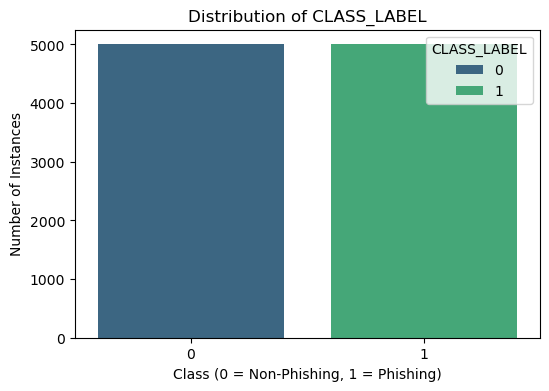

In [17]:
# Lets check the distribution of the feature and target variables in the dataset if there is any class imbalance
# and a graph to represent this
label_counts = phishing_data['CLASS_LABEL'].value_counts()
label_percent = phishing_data['CLASS_LABEL'].value_counts(normalize=True) * 100

#Display counts and percentages
print('Class Counts:\n', label_counts)
print('\nClass Percentage:\n', label_percent)

# The Graph Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values, hue = label_counts.index, palette='viridis')
plt.title('Distribution of CLASS_LABEL')
plt.xlabel('Class (0 = Non-Phishing, 1 = Phishing)')
plt.ylabel('Number of Instances')
plt.xticks([0, 1])
plt.show()

In [20]:
# finding more information about the dataset, ie looking for what is unique to each column in terms of their data types if there is any
phishing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  int64  
 1   SubdomainLevel                      10000 non-null  int64  
 2   PathLevel                           10000 non-null  int64  
 3   UrlLength                           10000 non-null  int64  
 4   NumDash                             10000 non-null  int64  
 5   NumDashInHostname                   10000 non-null  int64  
 6   AtSymbol                            10000 non-null  int64  
 7   TildeSymbol                         10000 non-null  int64  
 8   NumUnderscore                       10000 non-null  int64  
 9   NumPercent                          10000 non-null  int64  
 10  NumQueryComponents                  10000 non-null  int64  
 11  NumAmpersand                        10000 

In [58]:
"""
this shows the statistical sumery for numerical columns and if you need to mormalise your data where there is too  much variance known as outliers, 
so that the model can do well
in this data set the max row data is too far from the the other records, you neeed to watch it when working on the model
"""
phishing_data.describe()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,19.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


examining the mean, standard deviation, range, and quartiles of all features frm the describe cell above
Key Observations:
•	Features like UrlLength (mean = 70, std = 33) and NumDash (std = 3.1) show high variability.
•	Many binary features (e.g., AtSymbol, TildeSymbol, IframeOrFrame) have means close to 0 or 1, suggesting sparse distributions (mostly 0s or 1s).
•	Ratio Tranformed features such as UrlLengthRT, PctExtResourceUrlsRT, AbnormalExtFormActionR include negative values (-1), suggesting they are encoded transformations (e.g., -1 = missing or abnormal, 0 = normal, 1 = suspicious).


Preapare and Clean Ratio Transformed Feature
(Ratio Transformed) features is crucial for preparing your dataset for modeling. These Ratio transformed features (like UrlLengthRT, AbnormalExtFormActionR) often include values like -1, 0, 1 which represent:

-1: Missing or abnormal

0: Normal

1: Suspicious or risky

In [52]:
rto_variable = ["UrlLength", "PctExtResourceUrlsRT", "AbnormalExtFormActionR", "ExtMetaScriptLinkRT", "PctExtNullSelfRedirectHyperlinksRT",
               "SubdomainLevelRT"]

In [55]:
# Inspect Value Distribution
# check unique values and count of -1 for each Ratio transformed feature
for col in rto_variable:
    print(f"{col}:{phishing_data[col].value_counts(dropna=False).sort_index()}")

UrlLength:UrlLength
12     1
13     1
14     3
15     2
17     3
      ..
248    2
249    1
251    1
252    3
253    1
Name: count, Length: 226, dtype: int64
PctExtResourceUrlsRT:PctExtResourceUrlsRT
-1    2808
 0     851
 1    6341
Name: count, dtype: int64
AbnormalExtFormActionR:AbnormalExtFormActionR
-1     537
 0     994
 1    8469
Name: count, dtype: int64
ExtMetaScriptLinkRT:ExtMetaScriptLinkRT
-1    2139
 0    3988
 1    3873
Name: count, dtype: int64
PctExtNullSelfRedirectHyperlinksRT:PctExtNullSelfRedirectHyperlinksRT
-1    2953
 0     953
 1    6094
Name: count, dtype: int64
SubdomainLevelRT:SubdomainLevelRT
-1     100
 0     234
 1    9666
Name: count, dtype: int64
